In [1]:
from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [12]:
X,y = make_circles(n_samples=1000,noise=0.1,factor=.3)

In [13]:
X

array([[-0.20980576,  0.16409881],
       [ 1.0968722 ,  0.12436188],
       [-0.19778985,  0.82109925],
       ...,
       [-0.30206784, -0.97578104],
       [ 0.4463864 ,  0.3688972 ],
       [-0.8972725 , -0.50822542]])

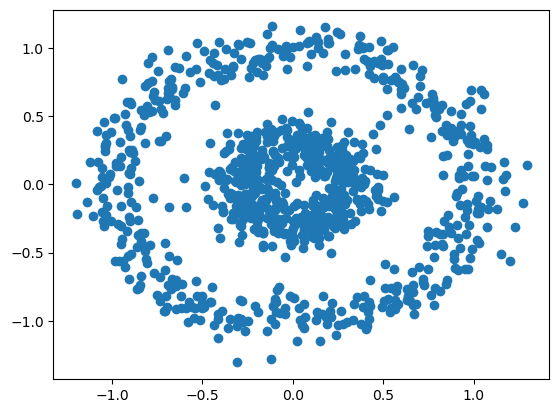

In [14]:
plt.scatter(X[:,0],X[:,1])

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
dbscan=DBSCAN(eps=0.10)

In [17]:
dbscan.fit_predict(X)

array([ 0,  1,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1,  1,  0,  1,  1,
        0,  1,  1,  1, -1,  1,  0,  1,  0,  0, -1,  0,  1,  1,  1,  0,  1,
        1,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  0, -1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0, -1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,
        1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  0,  1,  1,
        0, -1,  0,  0,  0,  0,  1,  0,  1, -1,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,
        0,  0,  1,  1,  1,  0,  0,  1, -1,  0,  0,  1,  1,  1,  0,  1,  0,
        0,  1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  1,  0, -1,  0,  0,
        1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,
        0,  0,  0,  0,  0

In [18]:
dbscan.labels_

array([ 0,  1,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1,  1,  0,  1,  1,
        0,  1,  1,  1, -1,  1,  0,  1,  0,  0, -1,  0,  1,  1,  1,  0,  1,
        1,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  0, -1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0, -1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,
        1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  0,  1,  1,
        0, -1,  0,  0,  0,  0,  1,  0,  1, -1,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,
        0,  0,  1,  1,  1,  0,  0,  1, -1,  0,  0,  1,  1,  1,  0,  1,  0,
        0,  1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  1,  0, -1,  0,  0,
        1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,
        0,  0,  0,  0,  0

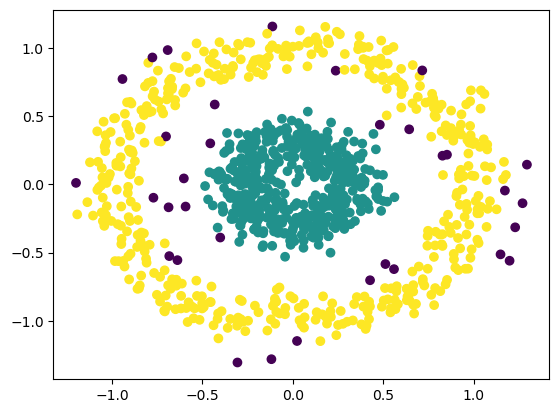

In [19]:
# Prediction points 
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)  # we can see outliers 

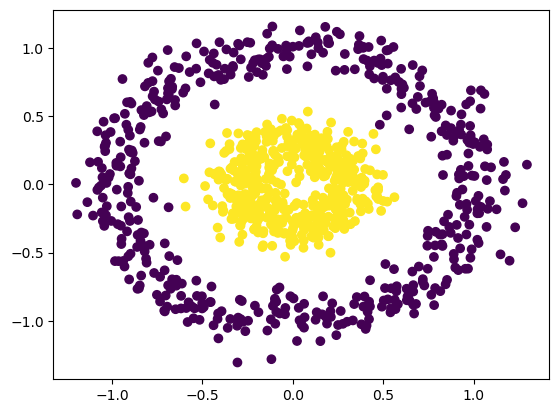

In [20]:
# Actual points 
plt.scatter(X[:,0],X[:,1],c=y)

# Global Outliers Detection

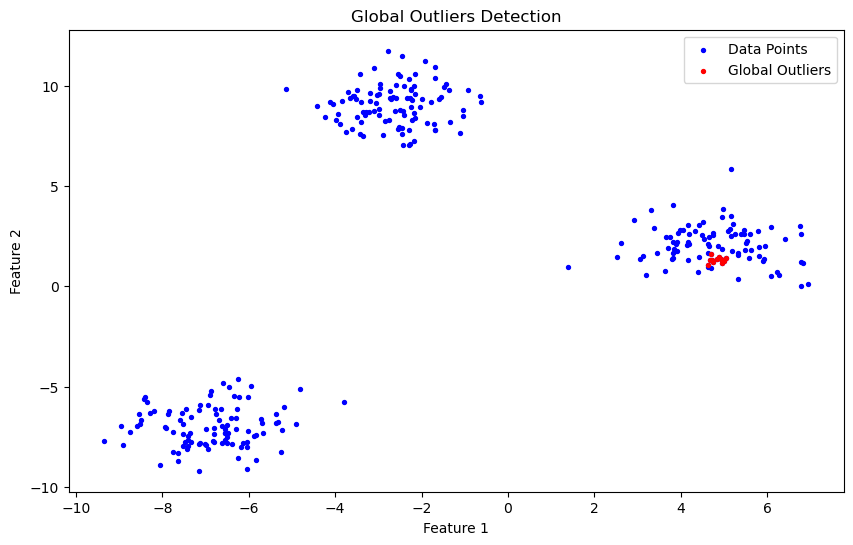

In [30]:
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate sample data
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)

# Combine the data with the labels for Z-score calculation
data_with_labels = np.hstack((X, dbscan.labels_.reshape(-1, 1)))

# Compute Z-scores for each feature and the labels
z_scores = zscore(data_with_labels, axis=0)

# Identify outliers
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)[0]

# Plot data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='b', s=8, label='Data Points')
plt.scatter(X[outliers, 0], X[outliers, 1], c='r', s=8, label='Global Outliers')
plt.title('Global Outliers Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()